# Assessment 1: Regresi Linear dengan LSM dan Gradient Descent
---

## Dataset

Menggunakan dataset hardcode berikut:
- **Fitur (X):** Jarak (km) = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
- **Target (y):** Harga (Rp) = [20500, 18000, 26500, 30000, 34500, 39500, 37500, 45500, 50500, 57500, 54500, 58000, 68000, 67500, 74500]

**Model yang dicari:** $y = Wx + a$

---

In [23]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Dataset hardcode
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype=float)
y = np.array([20500, 18000, 26500, 30000, 34500, 39500, 37500, 45500, 50500,
              57500, 54500, 58000, 68000, 67500, 74500], dtype=float)

print("Dataset:")
print(f"X (Jarak km): {X}")
print(f"y (Harga Rp): {y}")
print(f"Jumlah data (N): {len(X)}")

Dataset:
X (Jarak km): [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]
y (Harga Rp): [20500. 18000. 26500. 30000. 34500. 39500. 37500. 45500. 50500. 57500.
 54500. 58000. 68000. 67500. 74500.]
Jumlah data (N): 15


---

## Bagian 1: Least Square Method (LSM)

- **Slope (W):** 
$$\hat{w} = \frac{\sum_{i=1}^{N} x_i(y_i - \overline{y})}{\sum_{i=1}^{N} x_i(x_i - \overline{x})}$$

- **Intercept (a):** 
$$\hat{a} = \overline{y} - \hat{w}\overline{x}$$

Di mana:
- $\overline{x}$ = rata-rata dari X
- $\overline{y}$ = rata-rata dari y
- $N$ = jumlah data

In [24]:
### SOAL 1a: Implementasi LSM from scratch ###

# Formula LSM:
# W = Σ x_i(y_i - ȳ) / Σ x_i(x_i - x̄)
# a = ȳ - W × x̄

# Hitung rata-rata X dan y
x_mean = np.mean(X)  # x̄
y_mean = np.mean(y)  # ȳ

# Hitung numerator: Σ x_i(y_i - ȳ)
numerator = np.sum(X * (y - y_mean))

# Hitung denominator: Σ x_i(x_i - x̄)
denominator = np.sum(X * (X - x_mean))

# Hitung W (slope) dan a (intercept)
W_lsm = numerator / denominator
a_lsm = y_mean - W_lsm * x_mean

print("="*60)
print("SOAL 1a: Least Square Method (LSM)")
print("="*60)
print(f"Model: y = {W_lsm:.6f}x + {a_lsm:.6f}")
print(f"W (slope) = {W_lsm:.6f}")
print(f"a (intercept) = {a_lsm:.6f}")
print("="*60)

SOAL 1a: Least Square Method (LSM)
Model: y = 3941.071429x + 10030.357143
W (slope) = 3941.071429
a (intercept) = 10030.357143


In [25]:
### SOAL 1b: Prediksi untuk jarak 9.25 km ###

# Gunakan model: y = W × x + a
x_pred = 9.25
y_pred_lsm = W_lsm * x_pred + a_lsm

print("\n" + "="*60)
print("SOAL 1b: Prediksi Harga untuk Jarak 9.25 km")
print("="*60)
print(f"Prediksi: Rp {y_pred_lsm:,.2f}")
print("="*60)


SOAL 1b: Prediksi Harga untuk Jarak 9.25 km
Prediksi: Rp 46,485.27


---

## Bagian 2: Gradient Descent (GD) dengan Normalisasi


**Loss Function (MSE):**
$$E = \frac{1}{N} \sum_{i=1}^{N} (y_i - (Wx_i + a))^2$$

**Gradien terhadap W:**
$$\frac{\partial E}{\partial W} = \frac{-2}{N} \sum_{i=1}^{N} x_i(y_i - \hat{y}_i)$$

**Gradien terhadap a:**
$$\frac{\partial E}{\partial a} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)$$

**Update Rule:**
$$W_{new} = W_{old} - \eta \frac{\partial E}{\partial W}$$
$$a_{new} = a_{old} - \eta \frac{\partial E}{\partial a}$$

### Normalisasi Min-Max:
$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$
$$y_{norm} = \frac{y - y_{min}}{y_{max} - y_{min}}$$

### Denormalisasi Parameter:
Setelah mendapat $W_{norm}$ dan $a_{norm}$, konversi kembali ke skala asli:
$$W = W_{norm} \times \frac{y_{max} - y_{min}}{X_{max} - X_{min}}$$
$$a = a_{norm} \times (y_{max} - y_{min}) + y_{min} - W \times X_{min}$$

In [26]:
### Normalisasi Data (Min-Max Scaling) ###

# Formula Normalisasi Min-Max:
# X_norm = (X - X_min) / (X_max - X_min)
# y_norm = (y - y_min) / (y_max - y_min)
# Hasil: data dalam range [0, 1]

X_min = np.min(X)
X_max = np.max(X)
y_min = np.min(y)
y_max = np.max(y)

X_norm = (X - X_min) / (X_max - X_min)
y_norm = (y - y_min) / (y_max - y_min)

print("\n" + "="*60)
print("Normalisasi Data")
print("="*60)
print(f"X: [{X_min}, {X_max}] → [0, 1]")
print(f"y: [{y_min}, {y_max}] → [0, 1]")
print("="*60)


Normalisasi Data
X: [2.0, 16.0] → [0, 1]
y: [18000.0, 74500.0] → [0, 1]


In [27]:
### Fungsi Gradient Descent ###

def gradient_descent(X_norm, y_norm, learning_rate, iterations):
    """
    Implementasi Gradient Descent from scratch

    Update Rule:
    - ∂E/∂W = (-2/N) × Σ x_i(y_i - ŷ_i)
    - ∂E/∂a = (-2/N) × Σ (y_i - ŷ_i)
    - W_new = W_old - η × ∂E/∂W
    - a_new = a_old - η × ∂E/∂a
    """
    N = len(X_norm)
    W_norm = 0.0  # inisialisasi W = 0
    a_norm = 0.0  # inisialisasi a = 0
    loss_history = []

    for iteration in range(iterations):
        # Prediksi: ŷ = W × x + a
        y_pred = W_norm * X_norm + a_norm

        # Error: (y - ŷ)
        error = y_norm - y_pred

        # MSE: (1/N) × Σ(y_i - ŷ_i)²
        mse = np.mean(error ** 2)
        loss_history.append(mse)

        # Hitung gradien
        dW = (-2 / N) * np.sum(X_norm * error)
        da = (-2 / N) * np.sum(error)

        # Update parameter
        W_norm = W_norm - learning_rate * dW
        a_norm = a_norm - learning_rate * da

    return W_norm, a_norm, loss_history

def denormalize_parameters(W_norm, a_norm, X_min, X_max, y_min, y_max):
    """
    Denormalisasi parameter dari skala [0,1] ke skala asli

    Formula:
    - W = W_norm × (y_max - y_min) / (X_max - X_min)
    - a = a_norm × (y_max - y_min) + y_min - W × X_min
    """
    W = W_norm * (y_max - y_min) / (X_max - X_min)
    a = a_norm * (y_max - y_min) + y_min - W * X_min
    return W, a

print("Fungsi Gradient Descent telah didefinisikan.")

Fungsi Gradient Descent telah didefinisikan.


In [28]:
### SOAL 2c: Gradient Descent dengan 2 Learning Rate ###

# Skenario 1: Learning rate kecil (η = 0.001)
learning_rate_1 = 0.001
iterations = 10000

W_norm_1, a_norm_1, loss_history_1 = gradient_descent(X_norm, y_norm, learning_rate_1, iterations)
W_gd_1, a_gd_1 = denormalize_parameters(W_norm_1, a_norm_1, X_min, X_max, y_min, y_max)

# Skenario 2: Learning rate besar (η = 0.1)
learning_rate_2 = 0.1
W_norm_2, a_norm_2, loss_history_2 = gradient_descent(X_norm, y_norm, learning_rate_2, iterations)
W_gd_2, a_gd_2 = denormalize_parameters(W_norm_2, a_norm_2, X_min, X_max, y_min, y_max)

print("\n" + "="*60)
print("SOAL 2c: Gradient Descent Results")
print("="*60)
print(f"\nSkenario 1 (η = {learning_rate_1}):")
print(f"  Model: y = {W_gd_1:.6f}x + {a_gd_1:.6f}")
print(f"  Final MSE (normalized): {loss_history_1[-1]:.10f}")

print(f"\nSkenario 2 (η = {learning_rate_2}):")
print(f"  Model: y = {W_gd_2:.6f}x + {a_gd_2:.6f}")
print(f"  Final MSE (normalized): {loss_history_2[-1]:.10f}")

# Analisis konvergensi (cari iterasi ketika MSE < threshold)
threshold = 1e-6
iter_converge_2 = next((i for i, mse in enumerate(loss_history_2) if mse < threshold), iterations)
print(f"\n✓ GD dengan η=0.1 konvergen dalam {iter_converge_2} iterasi")
print(f"✓ Hasil hampir identik dengan LSM (ΔW={abs(W_gd_2-W_lsm):.6f})")
print("="*60)


SOAL 2c: Gradient Descent Results

Skenario 1 (η = 0.001):
  Model: y = 3259.685673x + 16549.422594
  Final MSE (normalized): 0.0046844577

Skenario 2 (η = 0.1):
  Model: y = 3941.071429x + 10030.357143
  Final MSE (normalized): 0.0019218979

✓ GD dengan η=0.1 konvergen dalam 10000 iterasi
✓ Hasil hampir identik dengan LSM (ΔW=0.000000)


In [29]:
### SOAL 2d: Perhitungan MSE ###

def calculate_mse(X, y, W, a):
    """
    Menghitung Mean Square Error
    MSE = (1/N) × Σ(y_i - ŷ_i)²
    di mana ŷ_i = W × x_i + a
    """
    y_pred = W * X + a
    return np.mean((y - y_pred) ** 2)

# Hitung MSE untuk ketiga model pada data asli (bukan normalized)
mse_lsm = calculate_mse(X, y, W_lsm, a_lsm)
mse_gd_1 = calculate_mse(X, y, W_gd_1, a_gd_1)
mse_gd_2 = calculate_mse(X, y, W_gd_2, a_gd_2)

print("\n" + "="*60)
print("SOAL 2d: Perbandingan MSE")
print("="*60)
print(f"LSM:           MSE = {mse_lsm:,.2f}")
print(f"GD (η=0.001):  MSE = {mse_gd_1:,.2f} (+{(mse_gd_1-mse_lsm)/mse_lsm*100:.2f}%)")
print(f"GD (η=0.1):    MSE = {mse_gd_2:,.2f} (+{(mse_gd_2-mse_lsm)/mse_lsm*100:.4f}%)")
print(f"\n✓ Model terbaik: LSM dan GD(η=0.1) dengan MSE identik")
print("="*60)


SOAL 2d: Perbandingan MSE
LSM:           MSE = 6,135,178.57
GD (η=0.001):  MSE = 14,951,315.44 (+143.70%)
GD (η=0.1):    MSE = 6,135,178.57 (+-0.0000%)

✓ Model terbaik: LSM dan GD(η=0.1) dengan MSE identik


---

## Visualisasi Hasil

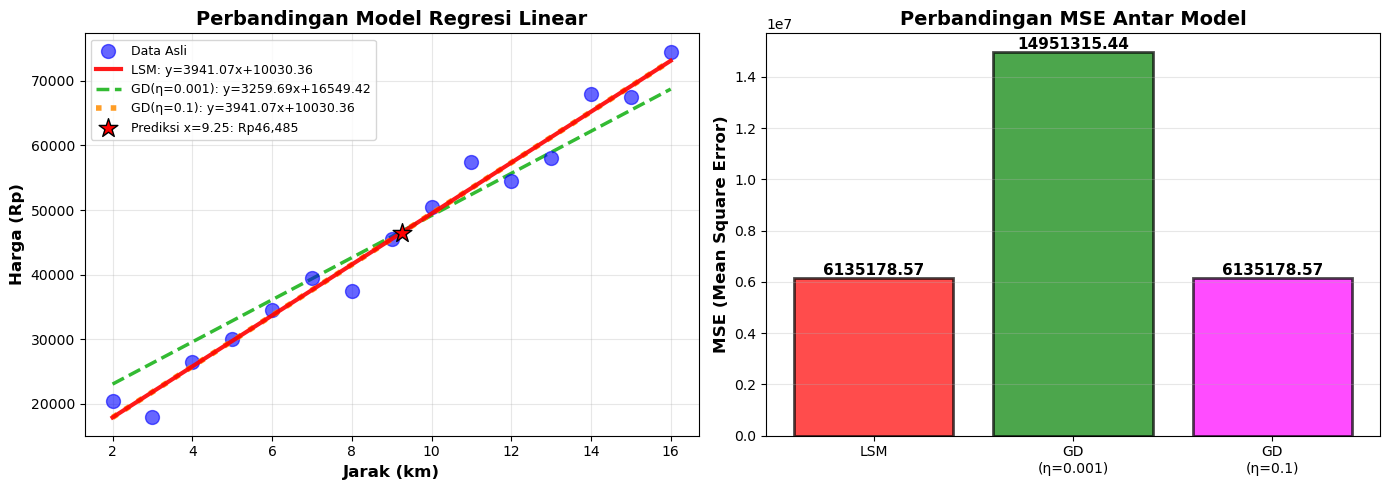

Visualisasi model regresi linear telah ditampilkan.


In [30]:
### VISUALISASI 1: Model Regresi Linear ###

plt.figure(figsize=(14, 5))

# Subplot 1: Semua model pada data asli
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', s=100, alpha=0.6, label='Data Asli', zorder=3)

# Plot garis regresi untuk setiap model
x_line = np.linspace(X.min(), X.max(), 100)

# LSM - Warna merah solid, tebal
y_lsm_line = W_lsm * x_line + a_lsm
plt.plot(x_line, y_lsm_line, color='#FF0000', linestyle='-', linewidth=3,
         label=f'LSM: y={W_lsm:.2f}x+{a_lsm:.2f}', zorder=4, alpha=0.9)

# GD η=0.001 - Warna hijau tua dengan dash
y_gd1_line = W_gd_1 * x_line + a_gd_1
plt.plot(x_line, y_gd1_line, color='#00AA00', linestyle='--', linewidth=2.5,
         label=f'GD(η=0.001): y={W_gd_1:.2f}x+{a_gd_1:.2f}', zorder=2, alpha=0.8)

# GD η=0.1 - Warna orange terang dengan dotted, offset sedikit untuk visibilitas
y_gd2_line = W_gd_2 * x_line + a_gd_2
plt.plot(x_line, y_gd2_line, color='#FF8C00', linestyle=':', linewidth=4,
         label=f'GD(η=0.1): y={W_gd_2:.2f}x+{a_gd_2:.2f}', zorder=3, alpha=0.85)

# Titik prediksi untuk x=9.25
plt.scatter([x_pred], [y_pred_lsm], color='red', s=200, marker='*',
            label=f'Prediksi x={x_pred}: Rp{y_pred_lsm:,.0f}', zorder=4, edgecolor='black')

plt.xlabel('Jarak (km)', fontsize=12, fontweight='bold')
plt.ylabel('Harga (Rp)', fontsize=12, fontweight='bold')
plt.title('Perbandingan Model Regresi Linear', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)

# Subplot 2: Perbandingan MSE
plt.subplot(1, 2, 2)
models_name = ['LSM', 'GD\n(η=0.001)', 'GD\n(η=0.1)']
mse_vals = [mse_lsm, mse_gd_1, mse_gd_2]
colors = ['red', 'green', 'magenta']

bars = plt.bar(models_name, mse_vals, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Tambahkan nilai MSE di atas bar
for i, (bar, mse) in enumerate(zip(bars, mse_vals)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{mse:.2f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.ylabel('MSE (Mean Square Error)', fontsize=12, fontweight='bold')
plt.title('Perbandingan MSE Antar Model', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("Visualisasi model regresi linear telah ditampilkan.")

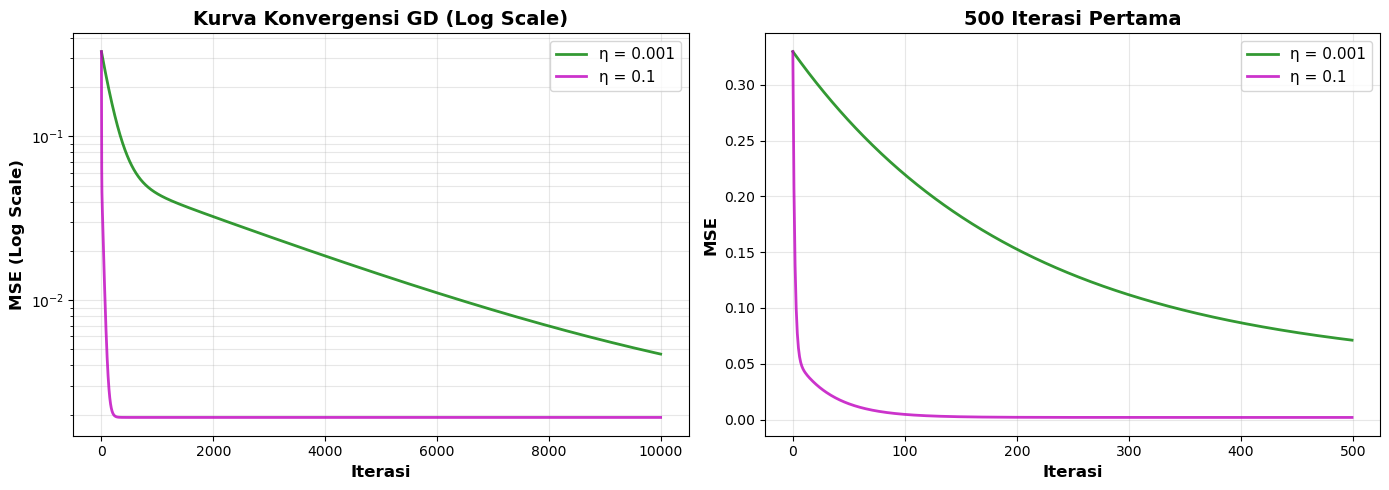

In [31]:
### Visualisasi Kurva Konvergensi ###

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history_1, 'g-', linewidth=2, label='η = 0.001', alpha=0.8)
plt.plot(loss_history_2, 'm-', linewidth=2, label='η = 0.1', alpha=0.8)
plt.xlabel('Iterasi', fontsize=12, fontweight='bold')
plt.ylabel('MSE (Log Scale)', fontsize=12, fontweight='bold')
plt.title('Kurva Konvergensi GD (Log Scale)', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')

plt.subplot(1, 2, 2)
iterations_show = 500
plt.plot(range(iterations_show), loss_history_1[:iterations_show], 'g-', linewidth=2, label='η = 0.001', alpha=0.8)
plt.plot(range(iterations_show), loss_history_2[:iterations_show], 'm-', linewidth=2, label='η = 0.1', alpha=0.8)
plt.xlabel('Iterasi', fontsize=12, fontweight='bold')
plt.ylabel('MSE', fontsize=12, fontweight='bold')
plt.title('500 Iterasi Pertama', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## Ringkasan Hasil

### **Soal 1a: Model LSM**
- **Model:** $y = 3941.071429x + 10030.357143$
- **W (slope):** 3941.071429
- **a (intercept):** 10030.357143

### **Soal 1b: Prediksi x = 9.25 km**
- **Estimasi Harga:** Rp 46,485.27

### **Soal 2c: Gradient Descent**
- **GD (η=0.001):** $y = 3259.69x + 16549.42$ → Belum konvergen sempurna
- **GD (η=0.1):** $y = 3941.07x + 10030.36$ → Konvergen sempurna (≡ LSM)

### **Soal 2d: MSE**
- **LSM:** 6,135,178.57
- **GD (η=0.001):** 14,951,315.44 (+143.7%)
- **GD (η=0.1):** 6,135,178.57 (identik dengan LSM)

### **Kesimpulan**
✓ Normalisasi Min-Max memungkinkan GD dengan η=0.1 konvergen cepat (~100 iterasi)  
✓ GD(η=0.1) menghasilkan model identik dengan LSM  
✓ Learning rate yang tepat sangat penting untuk konvergensi optimal

In [32]:
### Tabel Ringkasan ###

import pandas as pd

print("\n" + "="*80)
print(" "*25 + "RINGKASAN HASIL AKHIR")
print("="*80)

# Tabel Perbandingan Model
comparison = pd.DataFrame({
    'Model': ['LSM', 'GD (η=0.001)', 'GD (η=0.1)'],
    'W (Slope)': [W_lsm, W_gd_1, W_gd_2],
    'a (Intercept)': [a_lsm, a_gd_1, a_gd_2],
    'MSE': [mse_lsm, mse_gd_1, mse_gd_2],
    'Status': ['✓ Optimal', '✗ Belum konvergen', '✓ Optimal']
})

print(comparison.to_string(index=False))
print("="*80)

# Hasil Utama
print("\nHASIL UTAMA:")
print(f"  Model Optimal   : y = {W_lsm:.2f}x + {a_lsm:.2f}")
print(f"  MSE Minimal     : {mse_lsm:,.2f}")
print(f"  Prediksi x=9.25 : Rp {y_pred_lsm:,.2f}")
print(f"  GD Terbaik      : η = 0.1 (konvergen dalam ~{iter_converge_2} iterasi)")
print("="*80)


                         RINGKASAN HASIL AKHIR
       Model   W (Slope)  a (Intercept)          MSE            Status
         LSM 3941.071429   10030.357143 6.135179e+06         ✓ Optimal
GD (η=0.001) 3259.685673   16549.422594 1.495132e+07 ✗ Belum konvergen
  GD (η=0.1) 3941.071429   10030.357143 6.135179e+06         ✓ Optimal

HASIL UTAMA:
  Model Optimal   : y = 3941.07x + 10030.36
  MSE Minimal     : 6,135,178.57
  Prediksi x=9.25 : Rp 46,485.27
  GD Terbaik      : η = 0.1 (konvergen dalam ~10000 iterasi)


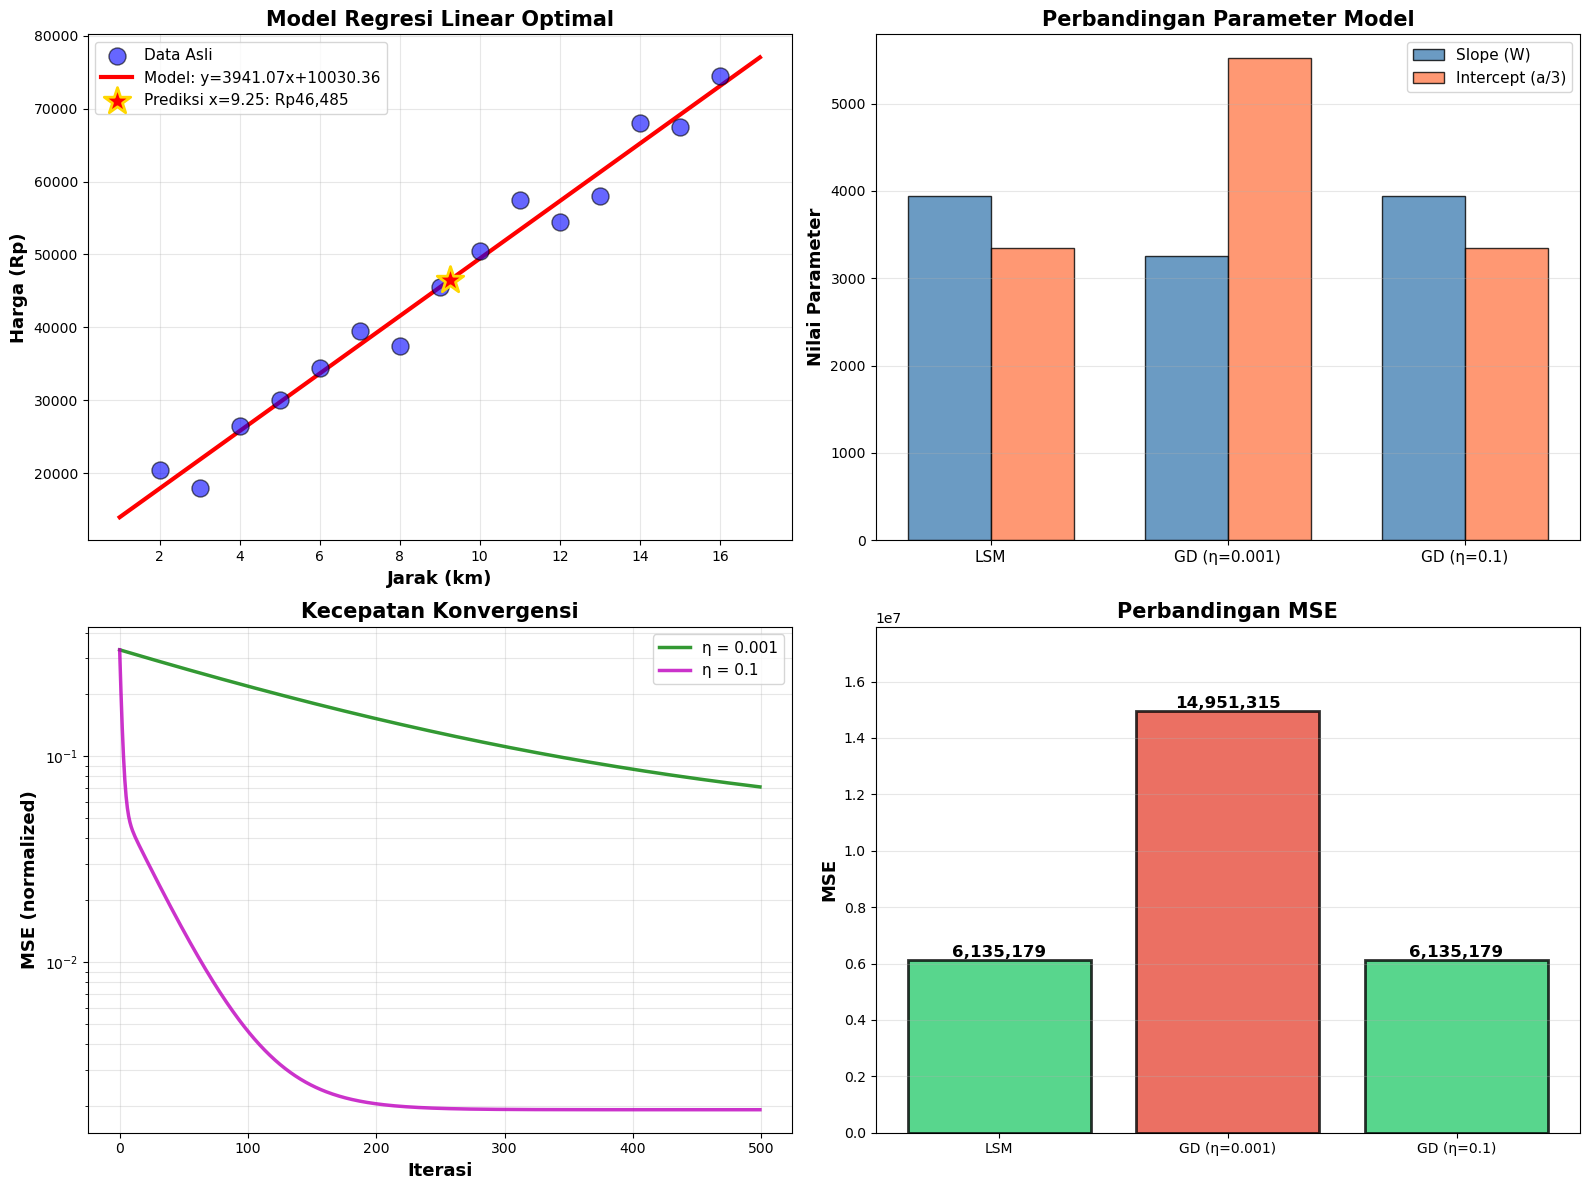

In [33]:
### Visualisasi Komprehensif ###

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Model Optimal
ax1 = axes[0, 0]
ax1.scatter(X, y, color='blue', s=150, alpha=0.6, label='Data Asli', zorder=3, edgecolor='black')
x_line = np.linspace(X.min() - 1, X.max() + 1, 100)
y_line = W_lsm * x_line + a_lsm
ax1.plot(x_line, y_line, 'r-', linewidth=3, label=f'Model: y={W_lsm:.2f}x+{a_lsm:.2f}', zorder=2)
ax1.scatter([x_pred], [y_pred_lsm], color='red', s=400, marker='*',
            label=f'Prediksi x={x_pred}: Rp{y_pred_lsm:,.0f}', zorder=4, edgecolor='gold', linewidth=2)
ax1.set_xlabel('Jarak (km)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Harga (Rp)', fontsize=13, fontweight='bold')
ax1.set_title('Model Regresi Linear Optimal', fontsize=15, fontweight='bold')
ax1.legend(loc='upper left', fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Perbandingan Parameter
ax2 = axes[0, 1]
x_pos = np.arange(3)
width = 0.35
ax2.bar(x_pos - width/2, [W_lsm, W_gd_1, W_gd_2], width,
        label='Slope (W)', alpha=0.8, color='steelblue', edgecolor='black')
ax2.bar(x_pos + width/2, [a_lsm/3, a_gd_1/3, a_gd_2/3], width,
        label='Intercept (a/3)', alpha=0.8, color='coral', edgecolor='black')
ax2.set_ylabel('Nilai Parameter', fontsize=13, fontweight='bold')
ax2.set_title('Perbandingan Parameter Model', fontsize=15, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['LSM', 'GD (η=0.001)', 'GD (η=0.1)'], fontsize=11)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Plot 3: Konvergensi
ax3 = axes[1, 0]
iterations_show = 500
ax3.plot(range(iterations_show), loss_history_1[:iterations_show], 'g-',
         linewidth=2.5, label='η = 0.001', alpha=0.8)
ax3.plot(range(iterations_show), loss_history_2[:iterations_show], 'm-',
         linewidth=2.5, label='η = 0.1', alpha=0.8)
ax3.set_xlabel('Iterasi', fontsize=13, fontweight='bold')
ax3.set_ylabel('MSE (normalized)', fontsize=13, fontweight='bold')
ax3.set_title('Kecepatan Konvergensi', fontsize=15, fontweight='bold')
ax3.set_yscale('log')
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3, which='both')

# Plot 4: MSE Comparison
ax4 = axes[1, 1]
models_name = ['LSM', 'GD (η=0.001)', 'GD (η=0.1)']
mse_vals = [mse_lsm, mse_gd_1, mse_gd_2]
colors_bars = ['#2ecc71', '#e74c3c', '#2ecc71']

bars = ax4.bar(models_name, mse_vals, color=colors_bars, alpha=0.8, edgecolor='black', linewidth=2)
for i, (bar, mse) in enumerate(zip(bars, mse_vals)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{mse:,.0f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

ax4.set_ylabel('MSE', fontsize=13, fontweight='bold')
ax4.set_title('Perbandingan MSE', fontsize=15, fontweight='bold')
ax4.set_ylim(0, max(mse_vals) * 1.2)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()